##### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2025 Semester 1

## Assignment 1: Scam detection with naive Bayes


**Student ID(s):**     `1455881`


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, GRAPHS, AND FIGURES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).** Results, figures, etc. which appear in this file but are NOT included in your report will not be marked.

**Adding proper comments to your code is MANDATORY. **

## 1. Supervised model training


In [128]:
import numpy as np
import pandas as pd


In [129]:
# read the input file
df = pd.read_csv("sms_supervised_train.csv")

print(df.head())

                                        textOriginal  \
0                       So u workin overtime nigpun?   
1  Also sir, i sent you an email about how to log...   
2  Ok lor. Anyway i thk we cant get tickets now c...   
3                                 Wat r u doing now?   
4  Is there a reason we've not spoken this year? ...   

                                    textPreprocessed  class  
0                                         ? u workin      0  
1  . . .. sir , send send email log payment ll an...      0  
2  ? . . 2 4 u quite get ok lor anyway thk ticket...      0  
3                                          ? u wat r      0  
4   ? great reason speak year anyways week good exam      0  


In [130]:
def create_vocabulary(data):
    words = " ".join(data['textPreprocessed'].fillna('').astype(str)).split()
    vocabulary, _ = np.unique(words, return_counts=True)
    vocabulary = list(vocabulary)
    return vocabulary

In [131]:
vocabulary = create_vocabulary(df)
len(vocabulary)

2006

In [132]:
def create_count(data, vocab):
    N = len(data)
    V = len(vocab)
    count= np.zeros((N, V), dtype=int)
    total = 0

    for i, text in enumerate(data['textPreprocessed'].fillna('').astype(str)):
        for word in text.split():
            if word in vocab:
                j = vocab.index(word)
                count[i, j] += 1
                total += 1
    
    return count

In [133]:
count = create_count(df, vocabulary)
count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [134]:
count_df = pd.DataFrame(count, columns=vocabulary)
count_df

,!,"""",#,$,%,&,','ll,'m,'re,...,yup,zed,|,,¡,£,ü,–,…,�
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# check class name is not existed in the vocabulary
print("class_label" in vocabulary)

False


In [136]:
# new dataframe with vocabulary frequency and class labels
count_df['class_label'] = df['class']
count_df

,!,"""",#,$,%,&,','ll,'m,'re,...,zed,|,,¡,£,ü,–,…,�,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1998,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# Probability of all the labels
def calc_prior(df):
    class_counts = df['class_label'].value_counts()
    N = len(df)
    priors = {}
    for c, count in class_counts.items():
        priors[c] = count / N
    return priors


In [ ]:
def word_likelihood_with_smoothing(data):
    # Create an empty dictionary to store the likelihoods
    word = {}
    labels = data['class_label']
    unique_labels = np.unique(labels)
    features_list = [col for col in vocabulary if col != 'class_label']
    total_sum = 0
    alpha = 1

    for feature in features_list:
        # feature_values = np.unique(data[feature])
        
        # Create a nested dictionary for each feature
        word[feature] = {}

        for label in unique_labels:
            # Create a nested dictionary for each label
            word[feature][label] = {}

            count = data[(data["class_label"] == label)][feature].sum()
            #print(count)
            total_count = data[data["class_label"] == label][features_list].sum(axis=1).sum()
            #print(total_count)

            # laplace smoothing
            total_count += alpha*len(features_list)
            count += alpha

            word[feature][label] = count / total_count
            total_sum += count / total_count
            #print(f"Likelihood of {feature} given label {label} is {word[feature][label]:.4f}")
            #print(f"Likelihood of {feature}={value} given label {label} is {likelihood[feature][label][value]:.4f}")
    #print(total_sum)
    return word

In [ ]:
# the function to train original dataframe at once
def train_model(data):
    vocabulary = create_vocabulary(data)
    count_df = pd.DataFrame(create_count(data, vocabulary), columns=vocabulary)

    try:
        if "class_label" in vocabulary:
            raise ValueError("The column name 'class_label' is already in use in the vocabulary. Please use a different name for the class column.")
        count_df['class_label'] = df['class']
    except ValueError as e:
        print(e)


    # Calculate prior probabilities
    prior_prob = calc_prior(count_df)

    # Calculate likelihoods
    likelihood = word_likelihood_with_smoothing(count_df)

    return prior_prob, likelihood, vocabulary

In [140]:
# train the model
priors_prob, word_probs, vocabulary= train_model(df)

print("Priors:", priors_prob)
print("likelihood:", word_probs)

Priors: {0: 0.8, 1: 0.2}
likelihood: {'!': {0: 0.017187325047587056, 1: 0.024350472877486682}, '"': {0: 0.005598477214197738, 1: 0.0007609522774214588}, '#': {0: 0.0053745381256298285, 1: 0.0006522448092183933}, '$': {0: 0.00044787817713581906, 1: 0.0007609522774214588}, '%': {0: 0.00016795431642593214, 1: 0.0008696597456245244}, '&': {0: 0.013100436681222707, 1: 0.008696597456245243}, "'": {0: 0.003918934049938417, 1: 0.0011957821502337211}, "'ll": {0: 0.0006158324935617512, 1: 0.00010870746820306555}, "'m": {0: 0.00011196954428395476, 1: 0.00010870746820306555}, "'re": {0: 0.0003359086328518643, 1: 0.00010870746820306555}, "'s": {0: 0.0052065838092038965, 1: 0.0018480269594521143}, "'ve": {0: 5.598477214197738e-05, 1: 0.00097836721382759}, '(': {0: 0.000727802037845706, 1: 0.00391346885531036}, ')': {0: 0.0013436345314074571, 1: 0.00391346885531036}, '*': {0: 0.0030231776956667787, 1: 0.007065985433199261}, '+': {0: 0.0005598477214197738, 1: 0.004022176323513425}, ',': {0: 0.02603291

In [141]:
def top_words_by_class(word_probs, top_n=10):
    class_words = {}

    # Initialize dictionary for each class
    for word, probs in word_probs.items():
        for label, prob in probs.items():
            if label not in class_words:
                class_words[label] = []
            class_words[label].append((word, prob))
    
    # Sort and print top N words for each class
    for label in sorted(class_words.keys()):
        print(f"\nTop {top_n} words for class {label}:")
        sorted_words = sorted(class_words[label], key=lambda x: x[1], reverse=True)
        for word, prob in sorted_words[:top_n]:
            print(f"{word}: {prob:.6f}")

In [142]:
top_words_by_class(word_probs, top_n=10)


Top 10 words for class 0:
.: 0.079330
,: 0.026033
?: 0.025585
u: 0.018923
...: 0.018755
!: 0.017187
..: 0.014948
;: 0.013156
&: 0.013100
go: 0.011141

Top 10 words for class 1:
.: 0.056528
!: 0.024350
,: 0.023481
call: 0.020546
£: 0.013915
free: 0.010545
/: 0.009131
2: 0.008805
&: 0.008697
?: 0.008479


In [143]:
def most_predictive_words(word_probs, pred_n=10):
    ratios = []

    for word, probs in word_probs.items():
        p0 = probs.get(0, 1e-10)  # Avoid division by zero
        p1 = probs.get(1, 1e-10)
        ratio = p1 / p0
        ratios.append((word, ratio))

    # Top predictors for class 1 (scam): Highest R values
    print(f"\nTop {pred_n} most predictive words for SCAM class (class 1):")
    top_scams = sorted(ratios, key=lambda x: x[1], reverse=True)[:pred_n]
    for word, r in top_scams:
        print(f"{word}: R = {r:.4f}")

    # Top predictors for class 0 (non-malicious): Lowest R values
    print(f"\nTop {pred_n} most predictive words for NON-MALICIOUS class (class 0):")
    top_non_malicious = sorted(ratios, key=lambda x: x[1])[:pred_n]
    for word, r in top_non_malicious:
        print(f"{word}: R = {r:.4f}")

In [144]:
most_predictive_words(word_probs, pred_n=10)


Top 10 most predictive words for SCAM class (class 1):
prize: R = 99.0284
tone: R = 64.0772
£: R = 49.7084
select: R = 46.6016
claim: R = 45.9543
paytm: R = 36.8929
code: R = 34.9512
award: R = 32.0386
won: R = 31.0677
18: R = 29.1260

Top 10 most predictive words for NON-MALICIOUS class (class 0):
;: R = 0.0165
...: R = 0.0174
gt: R = 0.0185
lt: R = 0.0187
:): R = 0.0209
ü: R = 0.0313
lor: R = 0.0347
hope: R = 0.0405
ok: R = 0.0405
d: R = 0.0474


In [234]:
import math
from math import factorial, log
from functools import reduce

def calc_posterior_with_smoothing(data, prior_prob, word_probs, alpha=1.0):
    posterior_probs = []
    classes = prior_prob.keys()

    for _, instance in data.iterrows():
        x_vector = instance.to_dict()
        n = sum(x_vector.values())  # total number of words in the row
 
        # Precompute factorials for multinomial coefficient
        # try:
        #numerator = factorial(n)
        #denominator = reduce(lambda a, b: a * b, [factorial(x) for x in x_vector.values() if x > 0], 1)
        #multinomial_coeff = numerator / denominator
        # Optional: Log multinomial coefficient

        log_multinomial_coeff = math.lgamma(n + 1) - sum(
            math.lgamma(x + 1) for x in x_vector.values() if x > 0
        ) # applying gamma function math.lgamma(n + 1) gives you log(factorial(n)) without computing the factorial directly

        # except OverflowError:
            # If n is too large, we can safely omit multinomial coefficient (constant across classes)
            # multinomial_coeff = 1.0

        post_probs = {}

        for label in classes:
            log_prob = math.log(prior_prob[label]) + log_multinomial_coeff
            #prob = prior_prob[label] * multinomial_coeff

            for word, x_i in x_vector.items():
                if x_i == 0:
                    continue

                # Get smoothed P(word | class)
                p_c_i = word_probs.get(word, {}).get(label, None)
                if p_c_i is None:
                    # If somehow missing, apply Laplace smoothing manually
                    V = len(word_probs)
                    p_c_i = alpha / (alpha * V)
                    # print the misssing value:
                    #print("mission value with smoothing:", word)

                #print("word:", word)
                #print("pci:",p_c_i)
                #prob *= p_c_i ** x_i
                log_prob += x_i * math.log(p_c_i)

            post_probs[label] = log_prob

        # Normalize
        #total = sum(post_probs.values())
        #if total == 0:
            #norm_probs = {label: 1.0 / len(classes) for label in classes}
        #else:
            #norm_probs = {label: post_probs[label] / total for label in classes}

        posterior_probs.append(post_probs)

    return posterior_probs

In [146]:
# posterior_prob testing 
#posterior_probs = calc_posterior_with_smoothing(test_count, priors_prob, word_probs)
#print(posterior_probs)

In [249]:
def predict_test_with_smoothing(data, prior_prob, likelihood):
    # Calculate posterior log-probabilities
    posterior_probs = calc_posterior_with_smoothing(data, prior_prob, likelihood)

    # Find the class with the highest log-probability
    argmax_labels = []
    for post_probs in posterior_probs:
        max_prob = -math.inf
        max_label = None
        for label, log_prob in post_probs.items():
            if log_prob > max_prob:
                max_prob = log_prob
                max_label = label
        if max_label is not None:
            argmax_labels.append(max_label)
    return argmax_labels, posterior_probs

## 2. Supervised model evaluation

In [193]:
test_df = pd.read_csv("sms_test.csv")

In [194]:
test_vocabulary = create_vocabulary(test_df)
len(test_vocabulary)

1641

In [195]:
test_count = pd.DataFrame(create_count(test_df, test_vocabulary), columns = test_vocabulary)
test_count

,!,"""",#,$,%,&,','ll,'m,'re,...,yun,yup,zed,|,,£,ü,–,…,�
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
predictions, posterior_probs = predict_test_with_smoothing(test_count, priors_prob, word_probs)

In [197]:
def calc_accuracy(predictions, true_labels):
    correct = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == true_labels[i]:
            correct += 1
    accuracy = correct / total
    print("correct predict: ", correct)
    print("total test: ", total)
    return accuracy

In [198]:
true_labels = test_df['class'].tolist()
accuracy = calc_accuracy(predictions, true_labels)
print("Accuracy:", accuracy)

correct predict:  975
total test:  1000
Accuracy: 0.975


In [154]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

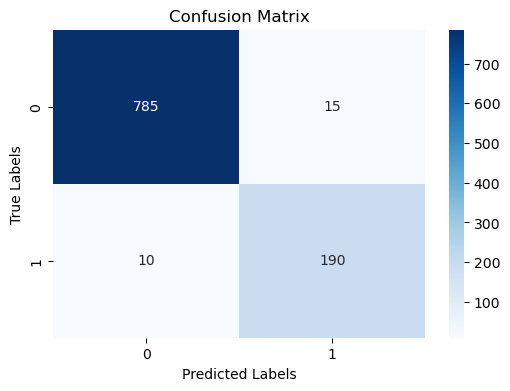


Classification Report:
              precision    recall  f1-score   support

           0     0.9874    0.9812    0.9843       800
           1     0.9268    0.9500    0.9383       200

    accuracy                         0.9750      1000
   macro avg     0.9571    0.9656    0.9613      1000
weighted avg     0.9753    0.9750    0.9751      1000



In [199]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(true_labels, predictions, digits=4))

In [200]:
# out-of-vocabulary words in the test set
def new_vocab(vocab1, vocab2):
    new_words = set(vocab1) - set(vocab2)
    if new_words:
        print("New words not in training vocabulary:")
        print(new_words)
        print("Number of new words:")
        print(len(new_words))
    else:
        print("All test vocabulary words are present in the training vocabulary.")


In [202]:
new_vocab(test_vocabulary, vocabulary)

New words not in training vocabulary:
{'possession', 'title', 'bet', 'infernal', 'esplanade', 'fromm', 'trouble', 'skype', '://', 'activity', 'pg', '0845', 'armand', 'realise', 'ru', '81151', 'dreams', 't-mobile', 'law', 'piece', 'boston', 'ec2a', 'oz', 'daddy', 'empty', 'lecture', 'sup', 'definitely', 'feelin', '2nite', 'nyc', 'fyi', 'legal', 'annoying', 'prabha', 'postcode', 'require', 'aiyar', 'realy', '87131', 'market', '=d', 'girlfrnd', 'gram', 'grl', 'mini', '32', 'fee', 'dick', 'holla', 'nearly', 'pie', 'fetch', 'fault', 'manage', 'pack', 'report', '0578', 'asleep', 'calling', 'journey', 'rally', 'hmv', 'ta', 'cancer', 'k.', '6hrs', 'inside', 'experience', 'harry', 'wed', 'greet', 'sen', 'woke', 'depend', '7250i', 'yijue', 'hook', 'drivin', 'befor', 'exactly', 'lay', 'lift', 'yahoo', 'lmao', 'din', 'affair', '1956669', 'challenge', 'plot', 'wet', 'act', 'fire', 'bud'}
Number of new words:
94


In [270]:
def predict_confidence(test_df, posterior_probs, prediction, class1=0, class2=1):
    results = []

    for i, post_probs in enumerate(posterior_probs):
        log_prob_c0 = post_probs[class1]
        log_prob_c1 = post_probs[class2]

        # Convert log probs to actual probs via softmax normalization (optional but more accurate)
        max_log = max(log_prob_c0, log_prob_c1)
        prob_c0 = math.exp(log_prob_c0 - max_log)
        prob_c1 = math.exp(log_prob_c1 - max_log)
        total = prob_c0 + prob_c1
        norm_prob_c0 = prob_c0 / total
        norm_prob_c1 = prob_c1 / total

        R = norm_prob_c1 / norm_prob_c0  # scam / non-malicious
        predicted_class = prediction[i]
        actual_class = test_df.iloc[i]['class'] if 'class' in test_df.columns else None
        original_text = test_df.iloc[i]['textOriginal'] if 'textOriginal' in test_df.columns else None

        results.append({
            'textOriginal': original_text,
            'predicted_class': predicted_class,
            'actual_class': actual_class,
            f'{class1}_prob': round(norm_prob_c0, 6),
            f'{class2}_prob': round(norm_prob_c1, 6),
            'R': round(R, 4)
        })

    # Convert to DataFrame if it's a list of dicts
    if isinstance(results, list):
        result_df = pd.DataFrame(results)


    return result_df

In [ ]:
def show_confidence_examples(result_df, class0=0, class1=1):

    # Create a column for distance from R = 1 (for boundary cases)
    result_df['R_diff_from_1'] = (result_df['R'] - 1).abs()

    # Get high-confidence predictions
    high_conf_scam = result_df[result_df['predicted_class'] == class1].sort_values('R', ascending=False).head(3)
    high_conf_nonmal = result_df[result_df['predicted_class'] == class0].sort_values('R').head(3)
    near_boundary = result_df.sort_values('R_diff_from_1').head(3)

    def print_category(df_subset, title):
        print(f"\n--- {title} ---")
        if df_subset.empty:
            print("No examples found.\n")
        else:
            print(df_subset[['original_text', 'predicted_class', 'actual_class',
                             f'{class0}_prob', f'{class1}_prob', 'R']].to_string(index=False))

    # Print each group
    print_category(high_conf_scam, f"Top {class1} predictions with high confidence (high R)")
    print_category(high_conf_nonmal, f"Top {class0} predictions with high confidence (low R)")
    print_category(near_boundary, "Top 3 examples near decision boundary (R ≈ 1)")

In [ ]:
results_df = predict_confidence(test_df, posterior_probs, predictions)
results_df

,textOriginal,predicted_class,actual_class,0_prob,1_prob,R
0,What's up? Do you want me to come online? If y...,0,0,0.999804,0.000196,2.000000e-04
1,I don't quite know what to do. I still can't g...,0,0,0.999999,0.000001,0.000000e+00
2,"House-Maid is the murderer, coz the man was mu...",0,0,0.999914,0.000086,1.000000e-04
3,Ok i thk i got it. Then u wan me 2 come now or...,0,0,1.000000,0.000000,0.000000e+00
4,Hello from Orange. For 1 month's free access t...,1,1,0.000000,1.000000,3.046419e+07
...,...,...,...,...,...,...
995,Well i will watch shrek in 3D!!B),0,0,0.980828,0.019172,1.950000e-02
996,"Babe, I'm back ... Come back to me ...",0,0,0.999999,0.000001,0.000000e+00
997,Got it! It looks scrumptious... daddy wants to...,0,0,0.999992,0.000008,0.000000e+00
998,Especially since i talk about boston all up in...,0,0,0.980671,0.019329,1.970000e-02


In [280]:
results_df = predict_confidence(test_df, posterior_probs, predictions)
show_confidence_examples(results_df, test_count)


--- Top 1 predictions with high confidence (high R) ---


KeyError: '[\'original_text\', \'     !  "  #  $  %  &  \\\'  \\\'ll  \\\'m  \\\'re  ...  yun  yup  zed  |  \\x92  £  ü  –  …  \\\\\\n0    0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n1    0  0  0  0  0  0  0    0   0    1  ...    0    0    0  0  0  0  0  0  0   \\n2    0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n3    0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n4    0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n..  .. .. .. .. .. .. ..  ...  ..  ...  ...  ...  ...  ... .. .. .. .. .. ..   \\n995  2  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n996  0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n997  2  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n998  2  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n999  0  0  0  0  0  0  0    0   0    0  ...    0    0    0  0  0  0  0  0  0   \\n\\n     �  \\n0    1  \\n1    0  \\n2    0  \\n3    0  \\n4    0  \\n..  ..  \\n995  0  \\n996  0  \\n997  0  \\n998  0  \\n999  0  \\n\\n[1000 rows x 1641 columns]_prob\'] not in index'

## 3. Extending the model with semi-supervised training

##### Read unlabelled csv file

In [203]:
unlabel_df = pd.read_csv("sms_unlabelled.csv")
unlabel_vocabulary = create_vocabulary(unlabel_df)
len(unlabel_vocabulary)

1983

In [204]:
new_vocab(unlabel_vocabulary, vocabulary)

New words not in training vocabulary:
{'agree', 'taunton', 'possession', 'title', 'bet', 'peace', 'brain', 'infernal', 'esplanade', 'fromm', 'trouble', 'skype', '://', 'activity', 'pg', '0845', 'armand', 'realise', 'hun', 'stick', 'ru', '81151', 'roger', 'nichols', 'sura', 't-mobile', 'law', 'piece', 'bahamas', 'boston', 'ec2a', 'daddy', 'empty', 'lecture', 'sup', 'definitely', 'feelin', '2nite', 'nyc', 'fyi', 'legal', 'annoying', 'prabha', 'cruise', 'postcode', 'require', 'aiyar', 'proof', 'realy', 'santa', 'should', '87131', 'market', '=d', 'girlfrnd', 'gram', 'mini', '32', 'fee', 'body', 'pull', 'dick', 'holla', 'sha', 'nearly', 'é', 'bloody', 'pie', 'skilgme', 'fetch', 'fault', 'skip', 'insurance', 'clock', 'manage', 'pack', '88039', 'report', '0578', 'asleep', 'calling', 'journey', 'hmv', 'ta', 'cancer', 'k.', 'callfreefone', '5min', 'inside', 'experience', 'harry', 'wed', 'greet', 'sen', 'woke', 'depend', '7250i', 'basic', 'yijue', 'hook', 'ma', 'befor', '08081560665', 'august', 

##### Baseline model using ramdom sampling for the 200 instances

In [205]:
# option 2
# baseline: random sampling 

def random_sample_and_merge(train_data, unlabelled_data, sample_size=200):
    # Randomly sample from unlabelled data
    sampled = unlabelled_data.sample(n=sample_size, random_state=123)
    
    # Extract labels
    # sampled_labels = sampled[label_col]
    # train_labels = train_data[label_col]
    
    # Drop label column from both dataframes to get feature-only data
    #sampled_features = sampled.drop(columns=[label_col])
    #train_features = train_data.drop(columns=[label_col])
    
    # Combine features and labels
    updated_data = pd.concat([train_data, sampled], axis=0)
    #updated_labels = pd.concat([train_labels, sampled_labels], axis=0)

    return updated_data #, updated_labels

In [185]:
baseline_train_data = random_sample_and_merge(
    df,
    unlabel_df,
    sample_size=200,
)

baseline_train_data

,textOriginal,textPreprocessed,class
0,So u workin overtime nigpun?,? u workin,0
1,"Also sir, i sent you an email about how to log...",". . .. sir , send send email log payment ll an...",0
2,Ok lor. Anyway i thk we cant get tickets now c...,? . . 2 4 u quite get ok lor anyway thk ticket...,0
3,Wat r u doing now?,? u wat r,0
4,Is there a reason we've not spoken this year? ...,? great reason speak year anyways week good exam,0
...,...,...,...
66,I'm okay. Chasing the dream. What's good. What...,. . . . good next dream okay chase,0
682,"And that's fine, I got enough bud to last most...",", get 's night fine least enough last that bud",0
903,Am i that much bad to avoid like this?,? like bad avoid,0
1790,Do u hav any frnd by name ashwini in ur college?,? u ur frnd name college hav,0


In [186]:
semi_vocabulary = create_vocabulary(baseline_train_data)
len(semi_vocabulary)

2034

In [187]:
semi_count = pd.DataFrame(create_count(baseline_train_data, semi_vocabulary), columns = semi_vocabulary)
semi_count

,!,"""",#,$,%,&,','ll,'m,'re,...,yup,zed,|,,¡,£,ü,–,…,�
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
# train the new semi-supervised model
base_priors_prob, base_word_probs, base_vocabulary = train_model(baseline_train_data)

print("Baseline Priors:", base_priors_prob)
print("Baseline likelihood:", base_word_probs)

Baseline Priors: {0.0: 0.7272727272727273, 1.0: 0.18181818181818182}
Baseline likelihood: {'!': {0.0: 0.017187325047587056, 1.0: 0.024350472877486682, nan: 0.0004985044865403788}, '"': {0.0: 0.005598477214197738, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '#': {0.0: 0.0053745381256298285, 1.0: 0.0006522448092183933, nan: 0.0004985044865403788}, '$': {0.0: 0.00044787817713581906, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '%': {0.0: 0.00016795431642593214, 1.0: 0.0008696597456245244, nan: 0.0004985044865403788}, '&': {0.0: 0.013100436681222707, 1.0: 0.008696597456245243, nan: 0.0004985044865403788}, "'": {0.0: 0.003918934049938417, 1.0: 0.0011957821502337211, nan: 0.0004985044865403788}, "'ll": {0.0: 0.0006158324935617512, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'m": {0.0: 0.00011196954428395476, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'re": {0.0: 0.0003359086328518643, 1.0: 0.00010870746820306555, nan: 0.0004985044865403

##### Second Strategy: Uncertainty Sampling, Pick high-entropy samples

In [165]:
# entropy computation
def compute_entropy_scores(unlabelled_data, posterior_function, prior, likelihood):
    
    posterior_probs = posterior_function(unlabelled_data, prior, likelihood)

    entropy_values = []
    for probs in posterior_probs:
        entropy = -sum(p * np.log2(p) for p in probs.values() if p > 0)
        entropy_values.append(entropy)

    return pd.Series(entropy_values, index=unlabelled_data.index)

In [222]:
def select_high_entropy_samples(unlabelled_data, entropy_scores, k=200):
    top_k_indices = entropy_scores.sort_values(ascending=False).head(k).index
    selected_df = unlabelled_data.loc[top_k_indices]
    return selected_df

In [258]:
entropy_count = pd.DataFrame(create_count(unlabel_df, unlabel_vocabulary), columns = unlabel_vocabulary)

# Step 1: Compute entropy
entropy_scores = compute_entropy_scores(entropy_count, calc_posterior_with_smoothing, priors_prob, word_probs)

# Step 2: Select top-k high-entropy samples
selected = select_high_entropy_samples(entropy_count, entropy_scores, k=200)

In [213]:
def merge_selected_with_labeled_data(
    original_text_data, original_train_data,
    selected_features, label_column='class'
):
    # Step 1: Extract matching rows from original_text_data
    selected_text = original_text_data.loc[selected_features.index, ['textOriginal', 'textPreprocessed', label_column]]

    # Step 2: Extract labels
    # selected_labels = selected_text[label_column]
    # selected_features_cleaned = selected_features.copy()

    # Step 3: Drop label column from text data and reset index
    # selected_text_cleaned = selected_text.drop(columns=[label_column])

    # Step 4: Combine with original training data
    #merged_features = pd.concat([original_train_data.drop(columns=[label_column]), selected_features_cleaned])
    #merged_labels = pd.concat([original_train_data[label_column], selected_labels])
    merged_text = pd.concat([
        original_train_data[['textOriginal', 'textPreprocessed']],
        selected_text
    ])

    return merged_text.reset_index(drop=True)

In [224]:
entropy_train_data = merge_selected_with_labeled_data(
    original_text_data=unlabel_df,
    original_train_data=df,
    selected_features=selected
)

entropy_train_data

,textOriginal,textPreprocessed,class
0,So u workin overtime nigpun?,? u workin,NaN
1,"Also sir, i sent you an email about how to log...",". . .. sir , send send email log payment ll an...",NaN
2,Ok lor. Anyway i thk we cant get tickets now c...,? . . 2 4 u quite get ok lor anyway thk ticket...,NaN
3,Wat r u doing now?,? u wat r,NaN
4,Is there a reason we've not spoken this year? ...,? great reason speak year anyways week good exam,NaN
...,...,...,...
2195,Does she usually take fifteen minutes to respo...,yes take question minute respond fifteen usually,0.0
2196,\tUR GOING 2 BAHAMAS! CallFREEFONE 08081560665...,. 2 go ur speak + ! £ claim 18 live 2000 cash ...,1.0
2197,Dear how is chechi. Did you talk to her,. talk dear,0.0
2198,Not to worry. I'm sure you'll get it.,. . get sure worry,0.0


In [225]:
# train the new semi-supervised model
entropy_priors_prob, entropy_word_probs, entropy_vocabulary = train_model(entropy_train_data)

print("Baseline Priors:", entropy_priors_prob)
print("Baseline likelihood:", entropy_word_probs)

Baseline Priors: {0.0: 0.7272727272727273, 1.0: 0.18181818181818182}
Baseline likelihood: {'!': {0.0: 0.017187325047587056, 1.0: 0.024350472877486682, nan: 0.0004985044865403788}, '"': {0.0: 0.005598477214197738, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '#': {0.0: 0.0053745381256298285, 1.0: 0.0006522448092183933, nan: 0.0004985044865403788}, '$': {0.0: 0.00044787817713581906, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '%': {0.0: 0.00016795431642593214, 1.0: 0.0008696597456245244, nan: 0.0004985044865403788}, '&': {0.0: 0.013100436681222707, 1.0: 0.008696597456245243, nan: 0.0004985044865403788}, "'": {0.0: 0.003918934049938417, 1.0: 0.0011957821502337211, nan: 0.0004985044865403788}, "'ll": {0.0: 0.0006158324935617512, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'m": {0.0: 0.00011196954428395476, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'re": {0.0: 0.0003359086328518643, 1.0: 0.00010870746820306555, nan: 0.0004985044865403

In [219]:
len(entropy_vocabulary)

2043

## 4. Supervised model evaluation

In [206]:
len(base_vocabulary)

2034

In [207]:
# baseline testing
base_predictions = predict_test_with_smoothing(test_count, base_priors_prob, base_word_probs)

mission value with smoothing: trouble
mission value with smoothing: trouble
mission value with smoothing: 2nite
mission value with smoothing: 2nite
mission value with smoothing: hmv
mission value with smoothing: hmv
mission value with smoothing: law
mission value with smoothing: law
mission value with smoothing: plot
mission value with smoothing: plot
mission value with smoothing: pie
mission value with smoothing: pie
mission value with smoothing: drivin
mission value with smoothing: drivin
mission value with smoothing: realise
mission value with smoothing: realise
mission value with smoothing: hook
mission value with smoothing: hook
mission value with smoothing: nearly
mission value with smoothing: nearly
mission value with smoothing: fetch
mission value with smoothing: fetch
mission value with smoothing: activity
mission value with smoothing: activity
mission value with smoothing: inside
mission value with smoothing: inside
mission value with smoothing: greet
mission value with smoot

In [208]:
true_labels = test_df['class'].tolist()
accuracy = calc_accuracy(base_predictions, true_labels)
print("Accuracy:", accuracy)

correct predict:  975
total test:  1000
Accuracy: 0.975


In [228]:
new_vocab(test_vocabulary, base_vocabulary)

New words not in training vocabulary:
{'yijue', 'oz', 'daddy', 'possession', 'hook', 'empty', 'fetch', 'lecture', 'drivin', 'definitely', 'feelin', 'lift', 'nyc', 'fyi', 'befor', 'infernal', 'legal', 'manage', 'annoying', 'esplanade', 'prabha', 'fromm', 'report', 'postcode', '0578', 'require', 'asleep', 'exactly', 'journey', 'lay', 'calling', 'skype', '://', 'yahoo', 'aiyar', 'rally', 'lmao', 'pg', 'activity', 'realy', 'din', '7250i', '0845', 'affair', 'ta', 'cancer', 'challenge', '87131', '6hrs', 'armand', 'market', '=d', 'girlfrnd', 'plot', 'ru', 'grl', '81151', 'mini', 'dreams', 'wet', 't-mobile', 'law', 'act', 'wed', 'piece', 'harry', 'greet', 'boston', 'sen', 'fee', '32', 'dick', 'depend', 'fire'}
Number of new words:
74


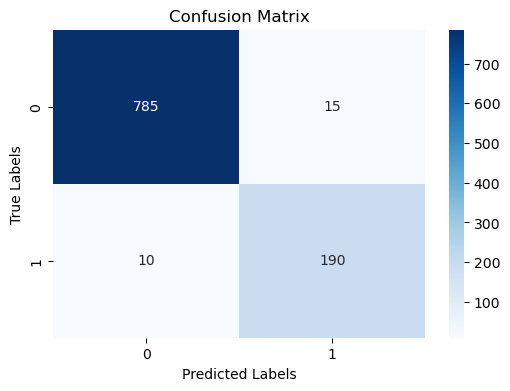


Classification Report:
              precision    recall  f1-score   support

           0     0.9874    0.9812    0.9843       800
           1     0.9268    0.9500    0.9383       200

    accuracy                         0.9750      1000
   macro avg     0.9571    0.9656    0.9613      1000
weighted avg     0.9753    0.9750    0.9751      1000



In [192]:
# Confusion Matrix
cm = confusion_matrix(true_labels, base_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(true_labels, base_predictions, digits=4))

In [174]:
new_vocab(test_vocabulary, base_vocabulary)

All test vocabulary words are present in the training vocabulary.


In [226]:
# entropy testing
entropy_predictions = predict_test_with_smoothing(test_count, entropy_priors_prob, entropy_word_probs)


mission value with smoothing: trouble
mission value with smoothing: trouble
mission value with smoothing: 2nite
mission value with smoothing: 2nite
mission value with smoothing: hmv
mission value with smoothing: hmv
mission value with smoothing: law
mission value with smoothing: law
mission value with smoothing: plot
mission value with smoothing: plot
mission value with smoothing: pie
mission value with smoothing: pie
mission value with smoothing: drivin
mission value with smoothing: drivin
mission value with smoothing: realise
mission value with smoothing: realise
mission value with smoothing: hook
mission value with smoothing: hook
mission value with smoothing: nearly
mission value with smoothing: nearly
mission value with smoothing: fetch
mission value with smoothing: fetch
mission value with smoothing: activity
mission value with smoothing: activity
mission value with smoothing: inside
mission value with smoothing: inside
mission value with smoothing: greet
mission value with smoot

In [227]:
true_labels = test_df['class'].tolist()
accuracy = calc_accuracy(entropy_predictions, true_labels)
print("Accuracy:", accuracy)

correct predict:  975
total test:  1000
Accuracy: 0.975


In [229]:
new_vocab(test_vocabulary, entropy_vocabulary)

New words not in training vocabulary:
{'ec2a', 'oz', 'daddy', 'possession', 'pie', 'empty', 'hook', 'fetch', 'drivin', 'lecture', 'sup', 'title', 'feelin', 'fault', '2nite', 'nyc', 'bet', 'befor', 'infernal', 'legal', 'manage', 'esplanade', 'prabha', 'pack', 'report', 'postcode', '0578', 'require', 'asleep', 'exactly', 'journey', 'lay', 'calling', 'aiyar', 'lift', 'yahoo', 'realy', 'rally', 'lmao', 'pg', 'activity', 'din', '0845', 'affair', 'ta', '1956669', 'challenge', '87131', '6hrs', 'girlfrnd', 'plot', 'ru', 'inside', 'grl', '81151', 'mini', 'dreams', 'experience', 't-mobile', 'law', 'act', 'wed', 'piece', 'harry', 'boston', 'sen', 'fee', '32', 'woke', 'dick', '7250i', 'fire', 'bud'}
Number of new words:
73


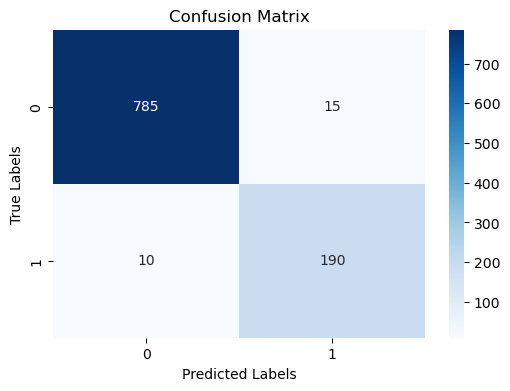


Classification Report:
              precision    recall  f1-score   support

           0     0.9874    0.9812    0.9843       800
           1     0.9268    0.9500    0.9383       200

    accuracy                         0.9750      1000
   macro avg     0.9571    0.9656    0.9613      1000
weighted avg     0.9753    0.9750    0.9751      1000



In [221]:
# Confusion Matrix
cm = confusion_matrix(true_labels, entropy_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(true_labels, entropy_predictions, digits=4))

In [178]:
### draft


In [179]:
all_data = pd.concat([df, unlabel_df], axis=0)
all_data

,textOriginal,textPreprocessed,class
0,So u workin overtime nigpun?,? u workin,0
1,"Also sir, i sent you an email about how to log...",". . .. sir , send send email log payment ll an...",0
2,Ok lor. Anyway i thk we cant get tickets now c...,? . . 2 4 u quite get ok lor anyway thk ticket...,0
3,Wat r u doing now?,? u wat r,0
4,Is there a reason we've not spoken this year? ...,? great reason speak year anyways week good exam,0
...,...,...,...
1995,Kay... Since we are out already,already ...,0
1996,call now 08707509020 Just 20p per min NTT Ltd...,", call call just rate national per 0870 min 08...",1
1997,Are you angry with me. What happen dear,. angry dear happen,0
1998,We r outside already.,. already r outside,0


In [180]:
# train all
all_priors_prob, all_word_probs, all_vocabulary = train_model(all_data)

print("Baseline Priors:", all_priors_prob)
print("Baseline likelihood:", all_word_probs)

Baseline Priors: {0.0: 0.4, 1.0: 0.1}
Baseline likelihood: {'!': {0.0: 0.017187325047587056, 1.0: 0.024350472877486682, nan: 0.0004985044865403788}, '"': {0.0: 0.005598477214197738, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '#': {0.0: 0.0053745381256298285, 1.0: 0.0006522448092183933, nan: 0.0004985044865403788}, '$': {0.0: 0.00044787817713581906, 1.0: 0.0007609522774214588, nan: 0.0004985044865403788}, '%': {0.0: 0.00016795431642593214, 1.0: 0.0008696597456245244, nan: 0.0004985044865403788}, '&': {0.0: 0.013100436681222707, 1.0: 0.008696597456245243, nan: 0.0004985044865403788}, "'": {0.0: 0.003918934049938417, 1.0: 0.0011957821502337211, nan: 0.0004985044865403788}, "'ll": {0.0: 0.0006158324935617512, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'m": {0.0: 0.00011196954428395476, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'re": {0.0: 0.0003359086328518643, 1.0: 0.00010870746820306555, nan: 0.0004985044865403788}, "'s": {0.0: 0.00520658380

In [181]:
all_predictions = predict_test_with_smoothing(test_count, all_priors_prob, all_word_probs)

In [182]:
true_labels = test_df['class'].tolist()
accuracy = calc_accuracy(all_predictions, true_labels)
print("Accuracy:", accuracy)

correct predict:  975
total test:  1000
Accuracy: 0.975
